<a href="https://colab.research.google.com/github/Bryce-Davidson/Machine_Learning/blob/master/Simple_Linear_Regression_Gradient_Descent_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is gradient descent?

Gradient descent was introduced to me as a way to optimize the paramaters to an equation for a line in order to fit a line to linear data. I have come later to realize that gradient descent is a way to optimize *any* parameter within *any* equation while attempting to use that equation to model data.

This problem comes up all over machine learning, including neural networks and stands as one of the most important algorithms in ML today.

Props to this video made by StatQuest!

[Gradient Descent, Step-by-Step](https://www.youtube.com/watch?v=sDv4f4s2SB8&t=789s)

This video allowed me to see how it is we are able to fit functions to data no matter how many paramaters those functions have and no matter what the function is.

A function as simple as

$\hat{y} = mx+b$

Will serve as a great example but is not representative of the possibilties of this algorithm.

This function has paramters $m$ and $b$ which we are able to ***estimate*** with respect to some linear data by using gradient descent.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let's try and do this using some dummy linear data I will generate. This linear data has only one feature $X$ and one output $y$.

In [ ]:
data = np.array([
                 [1,8],
                 [2,14],
                 [3,20]
                 ])
X = data[:, 0]
y = data[:, 1]
print(" X:", X, "\n", "y:", y)

 X: [1 2 3] 
 y: [ 8 14 20]


As you can see here the function that this data can be modeled by:

$y=6x_i+2$

Where $i$ is the index of the $i$th element in the X vector.

This is the equation we will estimate for by using the general equation for a line, and solving for $\theta_0$ and $\theta_1$


$y=\theta_0 x_i + \theta_1$


Where $\theta_0$ and $\theta_1$ are both paramaters we will estimate using gradient descent.

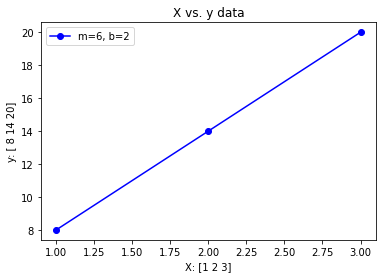

In [ ]:
plt.plot(X, y, "bo-")
plt.legend(["m=6, b=2"])
plt.title("X vs. y data")
plt.xlabel(f"X: {X}")
plt.ylabel(f"y: {y}");

Let's first attempt to only estimate one of the paramaters, say $\theta_1$ by allowing the paramater $\theta_0$ to equal $6$ (it's true value)

The First step is too literally just take a guess for $\theta_1$

Let's guess $\theta_1$ to be 8

In [ ]:
y_hat = 6*X + 8 

We can now plot both the real values for X against it's real values for y and the real values for X against the guessed values for y.   

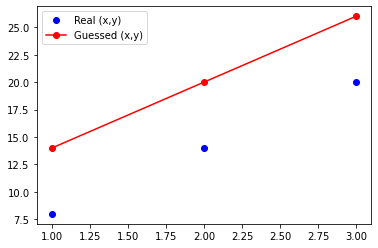

In [ ]:
plt.plot(X, y, "bo")
plt.plot(X, y_hat, "ro-")
plt.legend(["Real (x,y)", "Guessed (x,y)"]);

As you can see *visually* that the guess for $\theta_1$ is much to high, but we need a computational way to say that this guess for a line much to far away from the data we are trying to model.

Enter:
Mean Squared Error

$\frac{1}{n}\sum\limits_{i=1}^{n} (\hat{y_i}-y_i)^2$

What this function does is give us the ability to ask:
How far off from the original data are we with each x value in our $X$ data from $y$ when we use the function we just guessed **for each** individual point in our data?

This function is the sum of the squared distances between the real $y$ data and the guessed data $\hat{y}$, or to put it visually... the squared values of these dotted lines, all summed together and averaged.

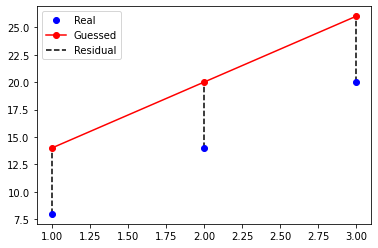

In [ ]:
fig, ax = plt.subplots()
ax.plot(X,y, "bo")
ax.plot(X,y_hat, "ro-")
ax.vlines(X,y,y_hat, linestyles="dashed")
ax.legend(["Real", "Guessed", "Residual"]);

Let's quickly write some functions to automate the process of guessing the paramaters in our function $\hat{y}$, computing the each of the guesses for $\hat{y}_i$ in terms of $x_i$, and computing the results of the MSE with respect to this guessed function.

Let's start by creating a function that generates the guessed $\hat{y}$ values by talking in a paramater $\theta_1$ and fixing the paramater $\theta_0$ to 6 like before.


In [ ]:
def y_hat(X, theta_0=6, theta_1=0):
  return theta_0*X + theta_1

Next we can write a function to compute the MSE by using the computed guesses from our function $\hat{y}(x_i)$.

In [ ]:
def MSE(y, y_hat):
  return np.sum((y_hat-y)**2, axis=0) / len(y)
# Test
MSE(y, y_hat(X, theta_1=8))

36.0

If you notice, what we are doing is making **the function we will be trying to minimize** (MSE), **a function** of the paramaters we are trying to *estimate.* (This will be shown in the MSE derivation with respect to our linear function below) We can do this with any function $\hat{y}$ that has paramaters $\{\theta_0, \theta_1...\theta_n \}$

Let's derive this mathematically.

---
$\text{MSE}=\frac{1}{n}\sum\limits_{i=1}^{n} (\hat{y_i}-y_i))^2 $

Where $y_i$ is the $i$th element in the $y$ data and $\hat{y_i}$ is the output value of the function we have guessed for the $i$th element of the $X$ data. $x_i$

$\because \hat{y_i} = \theta_0 x_i + \theta_1$

$=\frac{1}{n}\sum\limits_{i=1}^{n} ((\theta_0 x_i + \theta_1)-y_i)^2$

$\because\theta_0 =6$

$=\frac{1}{n}\sum\limits_{i=1}^{n} ((6 x_i + \theta_1)-y_i)^2$

As we can see, the MSE is now a function of $\theta_1$ This means, as we change $\theta_1$ the MSE will change as well.

The goal then, as expressed above is to minimize the MSE by changing $\theta_1$.

Instead of guessing just one value for $\theta_1$ let's guess a bunch of them within a range and see what happens to the (MSE).

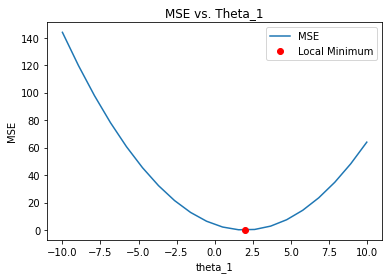

In [ ]:
KNOWN_LOCAL_OPTIMA_FOR_THETA_1 = 2

# To hold the computed MSE with respect to theta_1
loss = []
# The theta_1 values we used to compute the MSE
theta_1 = []
for i in np.linspace(-10,10,20):
  # Our guess for theta_1
  theta_1.append(i)
  # The corresonding MSE as a function of theta_1
  loss.append(MSE(y, y_hat(X, theta_1=i)))

fig, ax = plt.subplots()

ax.plot(theta_1, loss)
ax.plot(KNOWN_LOCAL_OPTIMA_FOR_THETA_1, 0, "ro");
ax.set_ylabel("MSE")
ax.set_xlabel("theta_1")

# ax.yaxis.label.set_color('white')
# ax.xaxis.label.set_color('white')
# ax.title.set_color("white")

ax.set_title("MSE vs. Theta_1")
ax.legend(["MSE", "Local Minimum"]);

What you will notice above is as we change $\theta_1$ the MSE moves along with it. This is because as we move our line up and down with $\theta_1$, the distances between the true results and the guessed results will change, therfore changing the MSE.

We would like a much better way to search for the paramater value $\theta_1$ that minimizes the MSE rather than to just guess all of them within a range and see what comes out.

This is where Gradient Descent comes in.

Gradient Descent gives us the ability to first pick a random value for $\theta_1$ **and then determine** which way we need to push $\theta_1$ in order for the MSE to be smaller. A.K.A to minimize the distance between our function and the data.

More generally what Gradient Descent really allows us to do is to be able to fit any function to a set of data by estimating the paramaters of that function to minimize *a loss function* like the MSE. 

We do this by making the **MSE** *a function of the* **paramaters** of the function we are trying to estimate. We then compute the partial derivatives of the **MSE** *with respect* to each of those paramaters in order to know if we are heading towards a local minimum or not. 

In this example the local minimum of the MSE function with respect to $\theta_0$ and $\theta_1$ is in effect, the true function of the data.

In order to figure out the partial derivatives of the MSE with respect to each of the paramaters $\theta_1, \theta_0$ we will compute them by hand in the steps below.

### $$ MSE=\frac{1}{n}\sum\limits_{i=1}^{n} (\hat{y_i}-y_i)^2 = \text{Loss Function} = L$$



### $$L(\theta_0, \theta_1) =\frac{1}{n}\sum\limits_{i=1}^{n} (\theta_0 x_i + \theta_1-y_i)^2 $$

Let's compute the partial derivative with resepct to $\theta_0$ first. Since in this example we know that the number of instances of $x_i$ is $\color{red}{3}$, we can expand this sum out to make things a little easier to visualize as well as make thinking about this porcess with larger and larger values for $n$ much easier.

#### $$L(\theta_0, \theta_1) =\frac{1}{n}\sum\limits_{i=1}^{n} ((\theta_0 x_i + \theta_1)-y_i)^2 $$

</br>

$$\text{letting } n=3$$

#### $$ L(\theta_0, \theta_1) =\frac{1}{\color{red}{3}}\sum\limits_{i=1}^{\color{red}{3}} ((\theta_0 x_i + \theta_1)-y_i)^2 $$ 

</br>

$$\text{Expanding the summation}$$

#### $$L(\theta_0, \theta_1) =\frac{1}{3} \big[ ((\theta_0 x_{\color{red}{1}} + \theta_1)-y_{\color{red}{1}})^2 + ((\theta_0 x_{\color{red}{2}} + \theta_1)-y_{\color{red}{2}})^2 + ((\theta_0 x_{\color{red}{3}} + \theta_1)-y_{\color{red}{3}})^2 \big]$$

</br>

$$\text{Removing inner brackets}$$

#### $$L(\theta_0, \theta_1) =\frac{1}{3} \big[ (\theta_0 x_1 + \theta_1-y_1)^2 + (\theta_0 x_2 + \theta_1-y_2)^2 + (\theta_0 x_3 + \theta_1-y_3)^2 \big]$$

</br>

At this point the familiarity of how to take the partial derivative of a sum of functions should make its self aparent, and it's only a matter of taking the partial derivatives for each of these functions with respect to $\theta_0$ and adding them together, that is: 

</br>

$$\frac{\partial L}{\partial \theta_0} \big[L(\theta_0, \theta_1) \big] 
=\frac{1}{3}\big[\color{green}{\frac{\partial L}{\partial \theta_0} 
\big[(\theta_0 x_1 + \theta_1 - y_1)^2\big]}
+ \frac{\partial L}{\partial \theta_0} \big[(\theta_0 x_2 + \theta_1-y_2)^2\big] 
+ \frac{\partial L}{\partial \theta_0} \big[(\theta_0 x_3 + \theta_1-y_3)^2\big] )$$

</br>

Inspecting just one of these functions and taking the partial derivative with respect to $\theta_0$ gives us:

</br>

#### $$\color{green}{ \frac{\partial L}{\partial \theta_0} \big[(\theta_0 x_1 + \theta_1-y_1)^2\big] }$$

</br>

</br>
$$\text{Chain rule}$$ 

#### $$=\color{red}{2}(\theta_0 x_1 + \theta_1-y_1)^{\color{red}{1}} \cdot \frac{\partial L}{\partial \theta_0} \big[ \theta_0 x_1 + \theta_1-y_1] $$

</br>
$$\because y_1 \text{ & } x_1 \text{ are constants, } \text{treating all other variables as constants}$$

#### $$=2(\theta_0 x_1 - y_1) \cdot \big[\color{red}{1} x_1 - \color{red}{0} - \color{red}{0}\big]$$ 
</br>
$$\text{Simplifying}$$ 

#### $$=2\color{red}{x_1}(\theta_0 x_1 + \theta_1-y_1)$$

</br>
$$\text{Generalizing for the sum, as all functions in the sum are the same}$$ 

#### $$=\color{green}{2x_i(\theta_0 x_i + \theta_1-y_i)}$$

</br>

Therefore we end up with the partial derivative of the MSE with respect to $\theta_0$ as:

$$\frac{\partial L}{\partial \theta_0}=\frac{2}{n}\sum\limits_{i=1}^{n} x_i(\theta_0 x_i + \theta_1-y_i)$$ 

Preforming the same steps with respect to $\theta_1$  gives us:

$$\frac{\partial L}{\partial \theta_1}=\frac{2}{n}\sum\limits_{i=1}^{n}(\theta_0 x_i + \theta_1-y_i)$$ 

With these partial derivates obtained we can now create an incremental update rule that change the values for $\theta_0$ and $\theta_1$ based on on their respective partial derivatives. 

The point of computing these partial derivates is to be able to ask when we have randomly picked a value for $\theta_0$ or $\theta_1$, which way do we push these parameters to minimize the MSE.

Given that the goal is to move down the output space of the MSE with respect to each of these paramaters we want to create an equation that updates each of these paramaters individually opposite of the direction of the slope.

This is, when the slope is positive we know that we are on the right side of a basin, and would like to go backwards (negative). And if the slope is negative that we are on the left side of a basin and would like to go forwards (positive). this means that whatever the polarity our slope is we can negate that polarity.

We want to model this update rule in a way that captures our desire to move in tiny steps backwards or forwards towards the bottom of the basin just so we don't step over it by accident, we can do this by specifying a constant $\alpha$ that will ensure our change in $\theta_0$ or $\theta_1$ is not too durastic, even if the slope at the current $\theta_0$ or $\theta_1$ is extremely steep (large in either direction). This constant is called the step size, or in machine learning contexts the *learning rate*.

We will define these update rules as follows.

Where $L$ is the MSE function defined in terms of $\theta_0$ and $\theta_1$

## $$\theta_{0}^{i+1}~:=~ \theta_{0}^{i} - \alpha \cdot \frac{\partial L}{\partial \theta_0^i}$$

## $$\theta_{1}^{i+1}~:=~ \theta_{1}^{i} - \alpha \cdot \frac{\partial L}{\partial \theta_1^i}$$

Let's put this all together shall we?

We have our data.

In [ ]:
data

array([[ 1,  8],
       [ 2, 14],
       [ 3, 20]])

We want to seprate the data into their respective inputs and outputs. (We could have easily chosen the other column for $X$ instead and the first one for $y$, it just depends on what you want the function to output)

In [ ]:
X = data[:, 0]
y = data[:, 1]
print(" X:", X, "\n", "y:", y)

 X: [1 2 3] 
 y: [ 8 14 20]


We want to visualize our data in order to get a grasp of what function we should choose to model the data.

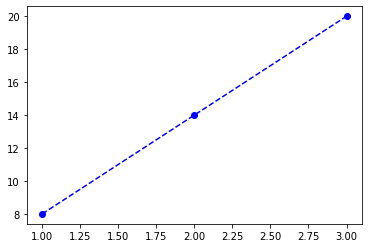

In [ ]:
plt.plot(X,y,"bo--");

We want to pick a general equation function that we think might reflect this relationship.

(we don't usually use $y$ because we pretend like $y$ already exists and we are trying to find it)

$\hat{y}=\theta_0x_i+\theta_1$

We want to define this function in code with it's paramaters as arguments in order for the algorithm to be able to control them.

In [ ]:
def y_hat(X, theta_0=0, theta_1=0):
  return theta_0*X + theta_1

You will notice that the input $X$ is described as a matrix with the math notation but is represented as a vector in our code. This is becasue generally we are not modeling such simple relationships with one input and one output. Generally we are modeling relationships with multiple inputs. You will find a multivariable input example in a later article.

We will define our loss function, in this case it is the MSE.

In [ ]:
def MSE(y, y_hat):
  return np.sum((y_hat-y)**2, axis=0) / len(y)

In [ ]:
MSE(y, y_hat(X, theta_0=6, theta_1=2))

0.0

And our partial derivative's for the paramaters $\theta_0, \theta_1$. 

(when the values for these paramaters are correct the slope of the MSE should be zero)

So at $\theta_0=6$ and $\theta_1=2$ 

$$\frac{\partial L}{\partial \theta_0}=0$$


$$\frac{\partial L}{\partial \theta_1}=0$$

In [ ]:
def DL_Dtheta_0(X, y, theta_0, theta_1):
  return 2/len(y) * np.sum(X*(theta_0*X + theta_1 - y))

def DL_Dtheta_1(X, y, theta_0, theta_1):
  return 2/len(y) * np.sum((theta_0*X + theta_1 - y))

print("DL/DTheta_0 at 6:", DL_Dtheta_0(X, y, 6.0, 2.0))
print("DL/DTheta_1 at 2:", DL_Dtheta_1(X, y, 6.0, 2.0))

DL/DTheta_0: 0.0
DL/DTheta_1: 0.0


We will define our incremental update rules within a function called gradient descent and allow the iterations to happen within a loop. This function will be written specifically for the linear example with two paramaters but methods later will include way to generalize this algorithm to any function with any number of paramaters. 

There is code within this algorithm that is only there to store the outputs of values through the iterations, this allows us to graph the process afterwards is not needed for the algorithm to work.

In [ ]:
def gradient_descent(MSE, X, y, y_hat, max_iter, alpha):
  loss = []
  iterations = range(max_iter)
  theta_0_vals = []
  theta_1_vals = []
  theta_0 = 0
  theta_1 = 0
  for i in iterations:
    # theta_0 update rule - as seen above
    theta_0 = theta_0 - alpha * DL_Dtheta_0(X, y, theta_0, theta_1)
    theta_0_vals.append(theta_0)
    
    # theta_1 update rule - as seen above
    theta_1 = theta_1 - alpha * DL_Dtheta_1(X, y, theta_0, theta_1)
    theta_1_vals.append(theta_1)

    loss.append(MSE(y, y_hat(X, theta_0, theta_1)))
  
  return loss, iterations, theta_0, theta_1, theta_0_vals, theta_1_vals

In [ ]:
loss, iterations, theta_0, theta_1, theta_0_vals, theta_1_vals = gradient_descent(MSE, X, y, y_hat, max_iter=90, alpha=0.3)

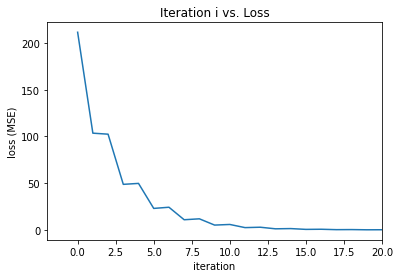

In [ ]:
plt.plot(iterations, loss)
plt.xlabel('iteration')
plt.ylabel('loss (MSE)')
plt.title('Iteration i vs. Loss')
plt.xlim(-2, 20);

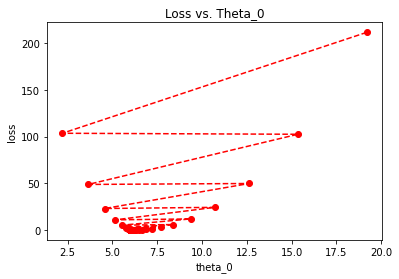

In [ ]:
plt.plot(theta_0_vals, loss, "ro--")
plt.title('Loss vs. Theta_0')
plt.xlabel('theta_0')
plt.ylabel('loss');

The final values are

In [ ]:
theta_0, theta_1

(6.000014873049379, 1.9999662234226112)